<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")

# Preprocess the dataset
tokenizer = Tokenizer(num_words=6308)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=500)

# Convert labels to categorical data
y = pd.get_dummies(df['label']).values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y_testt=y_test

# Create the model
model = Sequential()
model.add(Embedding(input_dim=6308, output_dim=32, input_length=500))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test accuracy: {accuracy*100:.2f}%')


Epoch 1/15
35/35 [==============================] - 3s 45ms/step - loss: 1.6038 - accuracy: 0.2277 - val_loss: 1.5945 - val_accuracy: 0.2523
Epoch 2/15
35/35 [==============================] - 1s 37ms/step - loss: 1.5768 - accuracy: 0.2986 - val_loss: 1.5524 - val_accuracy: 0.3430
Epoch 3/15
35/35 [==============================] - 2s 64ms/step - loss: 1.4882 - accuracy: 0.3586 - val_loss: 1.4703 - val_accuracy: 0.3430
Epoch 4/15
35/35 [==============================] - 1s 36ms/step - loss: 1.2983 - accuracy: 0.4650 - val_loss: 1.2736 - val_accuracy: 0.4773
Epoch 5/15
35/35 [==============================] - 1s 40ms/step - loss: 0.9978 - accuracy: 0.6023 - val_loss: 1.0620 - val_accuracy: 0.5626
Epoch 6/15
35/35 [==============================] - 3s 86ms/step - loss: 0.7264 - accuracy: 0.7386 - val_loss: 0.9503 - val_accuracy: 0.6443
Epoch 7/15
35/35 [==============================] - 2s 60ms/step - loss: 0.5231 - accuracy: 0.8118 - val_loss: 0.8976 - val_accuracy: 0.6842
Epoch 8/15
35

#Precision Recall F1


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
target_names = ['Cy-Flaming', 'Cy-Threat','Cy-Racism','Cy-Pull-a-Pig','Not Bullying']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))


# from sklearn.metrics import classification_report

# Convert y_pred from one-hot encoded to integer labels
# y_pred_int = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
# print(classification_report(y_test, y_pred_int, labels=[0, 1, 2, 3, 4]))



18/18 [==============================] - 1s 17ms/step
               precision    recall  f1-score   support

   Cy-Flaming       0.65      0.67      0.66       127
    Cy-Threat       0.72      0.70      0.71        91
    Cy-Racism       0.67      0.78      0.72       122
Cy-Pull-a-Pig       0.76      0.57      0.65       102
 Not Bullying       0.74      0.77      0.76       109

     accuracy                           0.70       551
    macro avg       0.71      0.70      0.70       551
 weighted avg       0.70      0.70      0.70       551



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
# path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/thesis/'

#Confusion Matrix


[[85 11 18  4  9]
 [18 64  3  1  5]
 [13  4 95  9  1]
 [ 7  0 23 58 14]
 [ 8 10  3  4 84]]


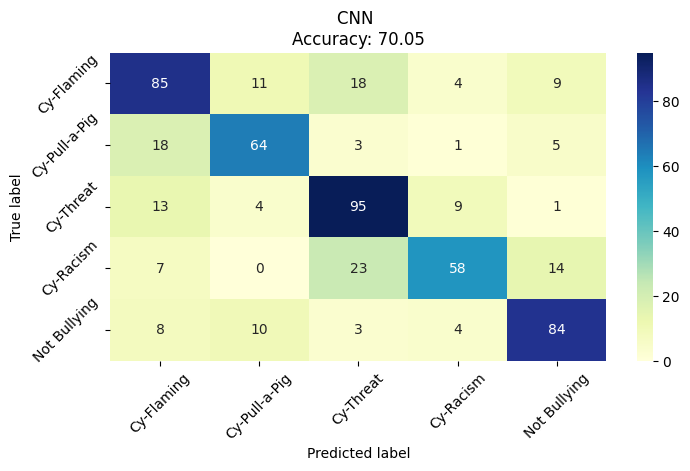

In [ ]:
#generate confusion matrix
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

# cm = confusion_matrix(y_testt, y_pred, labels=['Cy-Flaming', 'Cy-Pull-a-Pig', 'Cy-Threat', 'Cy-Racism', 'Not Bullying'])
# print(cm)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'], 
                     columns = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'],)

plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('CNN \nAccuracy: {0:.2f}'.format(accuracy_score(y_true, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
!pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#ROC

Epoch 1/15
35/35 [==============================] - 2s 37ms/step - loss: 1.6047 - accuracy: 0.2264 - val_loss: 1.5968 - val_accuracy: 0.2813
Epoch 2/15
35/35 [==============================] - 1s 36ms/step - loss: 1.5817 - accuracy: 0.2664 - val_loss: 1.5666 - val_accuracy: 0.3158
Epoch 3/15
35/35 [==============================] - 2s 55ms/step - loss: 1.5173 - accuracy: 0.3386 - val_loss: 1.5072 - val_accuracy: 0.3956
Epoch 4/15
35/35 [==============================] - 2s 46ms/step - loss: 1.3491 - accuracy: 0.4632 - val_loss: 1.2779 - val_accuracy: 0.5064
Epoch 5/15
35/35 [==============================] - 1s 32ms/step - loss: 1.0100 - accuracy: 0.6105 - val_loss: 1.0752 - val_accuracy: 0.5789
Epoch 6/15
35/35 [==============================] - 1s 31ms/step - loss: 0.7318 - accuracy: 0.7468 - val_loss: 0.9969 - val_accuracy: 0.5917
Epoch 7/15
35/35 [==============================] - 2s 53ms/step - loss: 0.5249 - accuracy: 0.8336 - val_loss: 0.9800 - val_accuracy: 0.6425
Epoch 8/15
35

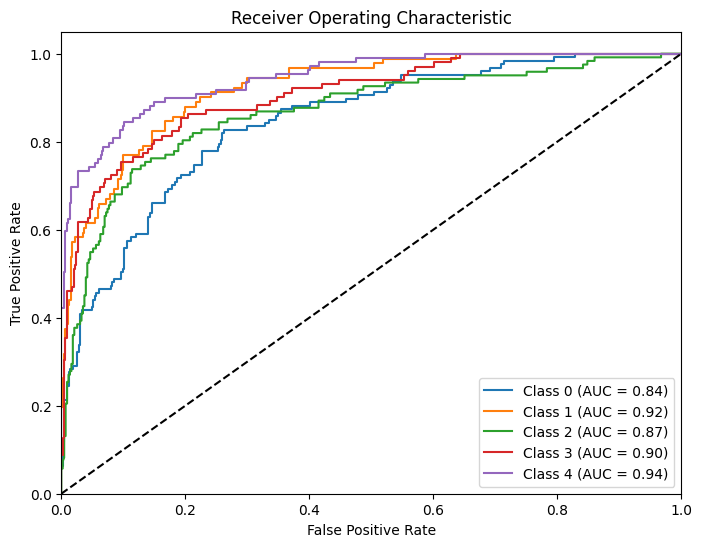

In [ ]:

import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")

# Preprocess the dataset
tokenizer = Tokenizer(num_words=6308)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=500)

# Convert labels to categorical data
y = pd.get_dummies(df['label']).values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Embedding(input_dim=6308, output_dim=32, input_length=500))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Obtain the predicted probabilities for each class
pred_probs = model.predict(X_test)

# Calculate the number of classes
num_classes = y_test.shape[1]

# Create an array to store the FPR and TPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    # Prepare the target labels for the current class
    target_label = y_test[:, i]
    
    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(target_label, pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
